In [99]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Initialize simulation variables
SigmaW = np.matrix([1]); # Process noise covariance
SigmaV = np.matrix([2]); # Sensor noise covariance

# Plant definition matrices
A = np.matrix([-.1]); 
B = np.matrix([1]);
C = np.matrix([1]); 
D = np.matrix([0]); 

# Number of iterations
maxIter = 100;
#random.seed(10)

# Initialize true state, state estimate, error covariance, initial input
xtrue = np.matrix([0]);  # Initialize true system initial state
xhat = np.matrix([0]);   # Initialize Kalman filter initial estimate
SigmaX = np.matrix([0]); # Initialize Kalman filter covariance
u = np.matrix([0]);      # Unknown initial driving input: assume zero

# Reserve storage for variables we might want to plot/evaluate
xstore = np.zeros(maxIter+1); 
xstore[:] = xtrue;
xhatstore = np.zeros(maxIter);
SigmaXstore = np.zeros(maxIter);

In [118]:
for k in range(maxIter):
  # KF Step 1: State estimate time update
  xhat = A @ xhat + B @ u; # use prior value of "u"

  # KF Step 2: Error covariance time update
  SigmaX = A @ SigmaX @ A.conj().T + SigmaW;

  # [Implied operation of system in background, with
  # input signal u, and output signal z]
  u = np.matrix(0.5*random.random() + math.cos(100*k/math.pi)+0.1*k); # for example... usually measured
  w = np.matrix(np.linalg.cholesky(SigmaW).conj().T*random.random());
  v = np.matrix(np.linalg.cholesky(SigmaV).conj().T*random.random());
  ztrue = C@xtrue + D@u + v;  # y is based on present x and u
  xtrue = A@xtrue + B@u + w;  # future x is based on present u

  # KF Step 3: Estimate system output
  zhat = C@xhat + D@u;

  # KF Step 4: Compute Kalman gain matrix
  L = SigmaX@C.conj().T/(C@SigmaX@C.conj().T + SigmaV);

  # KF Step 5: State estimate measurement update
  xhat = xhat + L@(ztrue - zhat);

  # KF Step 6: Error covariance measurement update
  SigmaX = SigmaX - L@C@SigmaX;

  # [Store information for evaluation/plotting purposes]
  xstore[k] = xtrue;
  xhatstore[k] = xhat;
  SigmaXstore[k] = SigmaX[:];

#calculate error
estErr = xstore[1::]-xhatstore;
print(f'RMS Error : {(np.mean(estErr * estErr)):.3f}.')

RMS Error : 1.741.


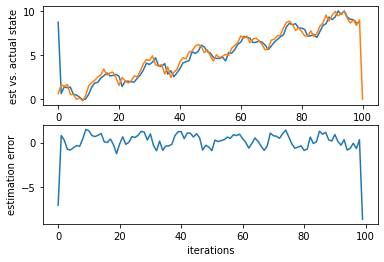

In [119]:
plt.subplot(2, 1, 1)
plt.plot(xhatstore)
plt.plot(xstore)
plt.ylabel('est vs. actual state')

plt.subplot(2, 1, 2)
plt.plot(estErr)
plt.ylabel('estimation error')
plt.xlabel('iterations');